In [1]:
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import rebound

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-24
eV=1.602176634e-12
h_bar=1.0545718e-27
c=2.99792458e10
au=1.496e13

h=0.6774

## Constants in mks unites
k_B=1.38064852e-23
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-27
eV=1.602176634e-19
h_bar=1.0545718e-34
c=2.99792458e8

## 2. a)

In [386]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [387]:
# time unit: 1/2pi

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "ias15"
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

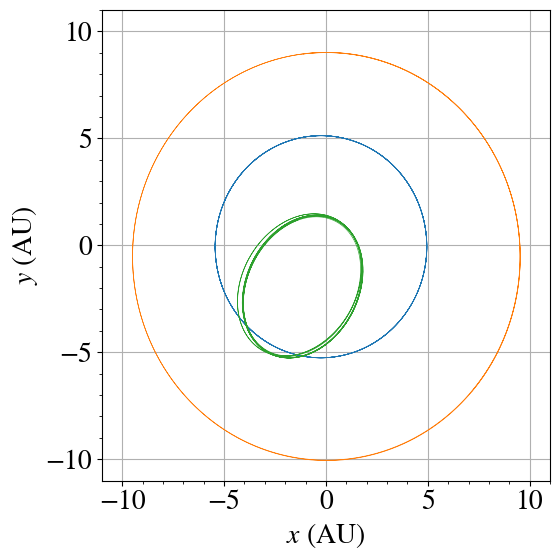

In [388]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(x[0], y[0], lw=0.5)
ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

ax1.set_xlim(-11,11)
ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

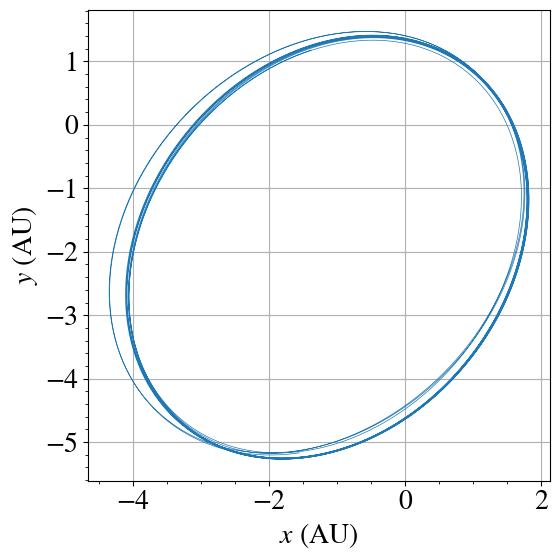

In [389]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [390]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.13960698693437937
Error: 3.4178560849174486 %


## 2. b)

<font size="5">
Other integrators and timesteps
</font>

<font size="5">
(1) WHFast with adaptive timesteps
</font>

In [391]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [392]:
# time unit: 1/2pi

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "whfast"
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

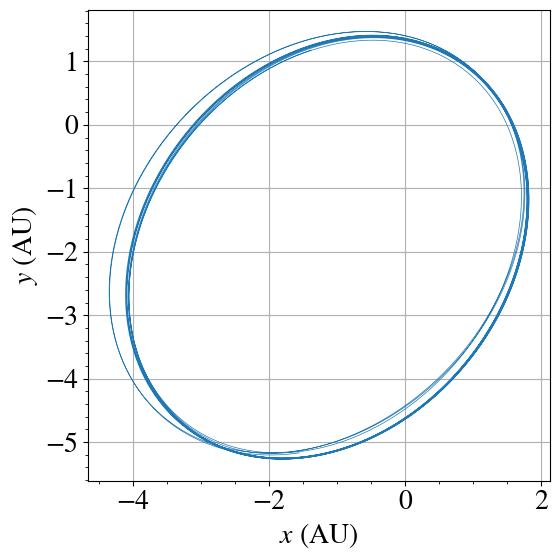

In [393]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [395]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.13960698694109827
Error: 3.417856080269214 %


<font size="5">
There is almost no difference between IAS15 and WHFast integrator.
</font>

<font size="5">
(2) WHFast with fixed timestep (1e-2)
</font>

In [473]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [474]:
# time unit: 1/2pi

Noutputs = 1000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "whfast"
sim.dt = 1e-2
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

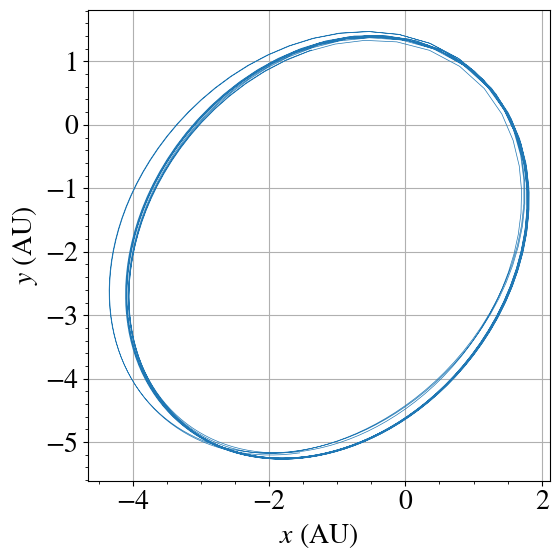

In [475]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [476]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.13960698761362772
Error: 3.41785561500356 %


<font size="5">
(3) WHFast with fixed timestep (1e-1)
</font>

In [477]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [478]:
# time unit: 1/2pi

Noutputs = 500
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "whfast"
sim.dt = 1e-1
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

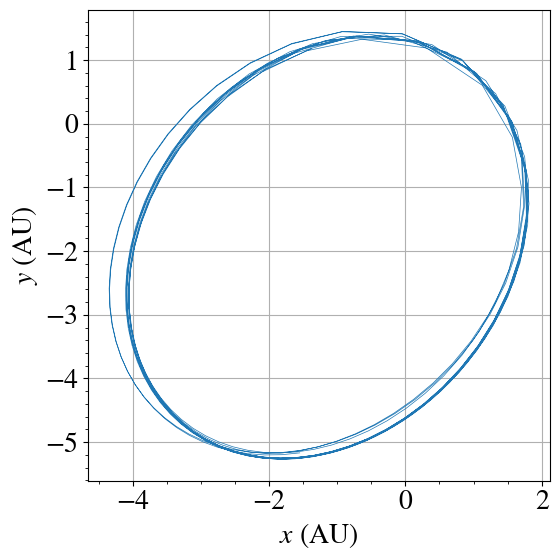

In [479]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [480]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.13960705062241896
Error: 3.4178120246054213 %


<font size="5">
(4) WHFast with fixed timestep (1)
</font>

In [481]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [482]:
# time unit: 1/2pi

Noutputs = 100
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "whfast"
sim.dt = 1
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

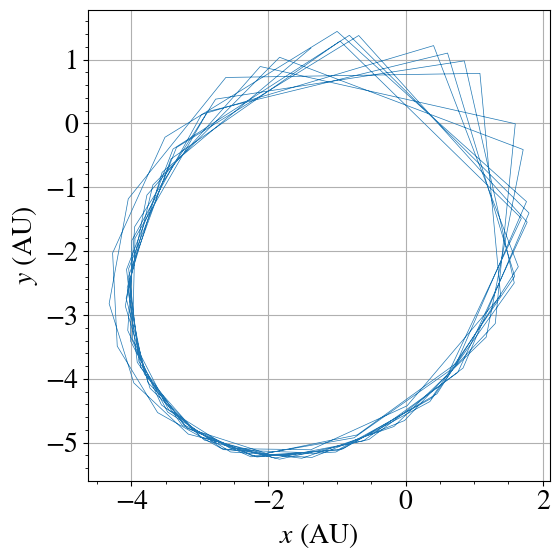

In [483]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [484]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.13959368734573485
Error: 3.4270569337623553 %


<font size="5">
(5) WHFast with fixed timestep (2)
</font>

In [485]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [486]:
# time unit: 1/2pi

Noutputs = 100
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "whfast"
sim.dt = 2
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

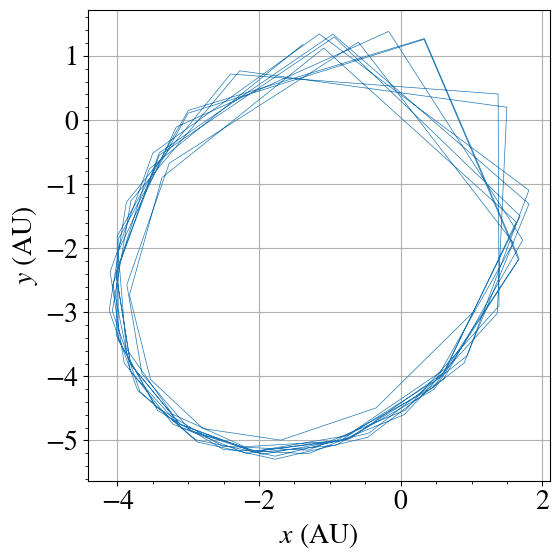

In [487]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [488]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.1495317110442527
Error: -3.4482123930723465 %


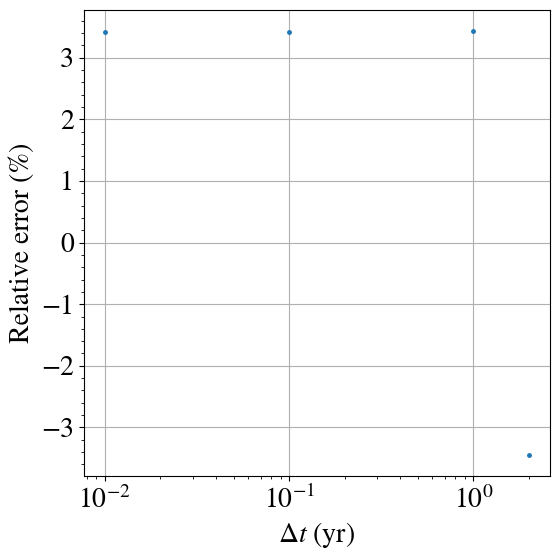

In [508]:
# WHFast timestep and errors

t1=1e-2
e1=3.41785561500356
t2=1e-1
e2=3.4178120246054213
t3=1
e3=3.4270569337623553
t4=2
e4=-3.4482123930723465

t=[t1,t2,t3,t4]
e=[e1,e2,e3,e4]

fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(t,e, '.', ms=5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.set_xscale('log')
ax1.grid()

ax1.set_xlabel('$\Delta t$ (yr)')
ax1.set_ylabel('Relative error (%)')
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

<font size="5">
I don't understand why but the error in energy conservation remain almost same even though timestep is changed.
    
However, the sign of the error suddenly changes if the timestep is larger than 1 year.
</font>

<font size="5">
(5) IAS15 with fixed minimum timestep (1e-2)
</font>

In [490]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [491]:
# time unit: 1/2pi

Noutputs = 1000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.ri_ias15.epsilon = 0
sim.ri_ias15.min_dt = 5e-3
sim.integrator = "ias15"
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

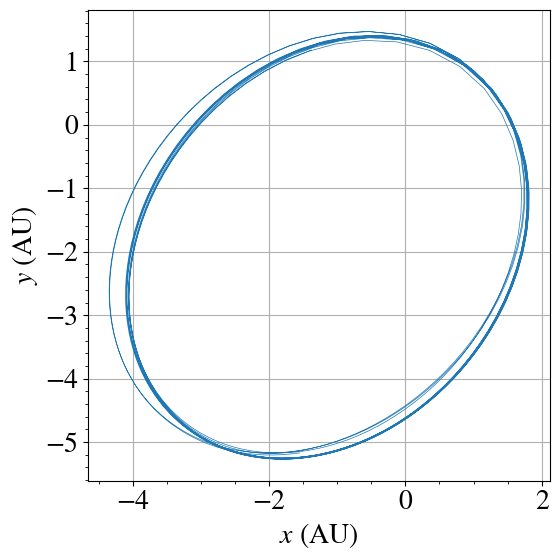

In [492]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [493]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.1396069869343556
Error: 3.4178560849338853 %


<font size="5">
(6) Gragg-Bulirsch-Stoer with fixed minimum timestep (1e-1)
</font>

In [494]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [495]:
# time unit: 1/2pi

Noutputs = 500
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


sim.integrator = "BS"
#sim.ri_bs.eps_rel = 1e-4
#sim.ri_bs.eps_abs = 1e-4
sim.ri_bs.min_dt = 1e-1
#sim.ri_bs.max_dt = 1e-2
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
xi_sun=ps[0].x
yi_sun=ps[0].y
zi_sun=ps[0].z
xi_j=ps[1].x
yi_j=ps[1].y
zi_j=ps[1].z
xi_s=ps[2].x
yi_s=ps[2].y
zi_s=ps[2].z
xi=ps[3].x
yi=ps[3].y
zi=ps[3].z
vxi=ps[3].vx
vyi=ps[3].vy
vzi=ps[3].vz


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[3].x
    y[2][i] = ps[3].y
    z[2][i] = ps[3].z
    
    
# final positions and velocities
xf_sun=ps[0].x
yf_sun=ps[0].y
zf_sun=ps[0].z
xf_j=ps[1].x
yf_j=ps[1].y
zf_j=ps[1].z
xf_s=ps[2].x
yf_s=ps[2].y
zf_s=ps[2].z
xf=ps[3].x
yf=ps[3].y
zf=ps[3].z
vxf=ps[3].vx
vyf=ps[3].vy
vzf=ps[3].vz

/home/jhl1862/venv/lib/python3.6/site-packages/rebound/simulation.py:712: RuntimeWarning: Minimal stepsize reached during ODE integration.
  warnings.warn(msg[1:], RuntimeWarning)


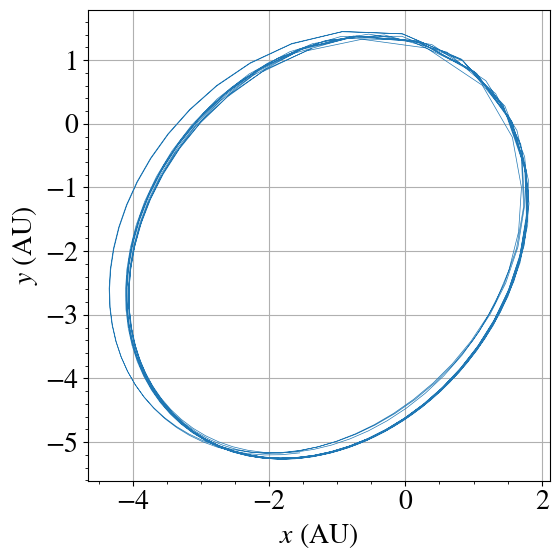

In [496]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [497]:
# initial energy and final energy

ri_sun=((xi-xi_sun)**2+(yi-yi_sun)**2+(zi-zi_sun)**2)**0.5
ri_j=((xi-xi_j)**2+(yi-yi_j)**2+(zi-zi_j)**2)**0.5
ri_s=((xi-xi_s)**2+(yi-yi_s)**2+(zi-zi_s)**2)**0.5
Ei=0.5*(vxi**2+vyi**2+vzi**2)-ps[0].m/ri_sun-ps[1].m/ri_j-ps[2].m/ri_s
print('Initial energy:',Ei)

rf_sun=((xf-xf_sun)**2+(yf-yf_sun)**2+(zf-zf_sun)**2)**0.5
rf_j=((xf-xf_j)**2+(yf-yf_j)**2+(zf-zf_j)**2)**0.5
rf_s=((xf-xf_s)**2+(yf-yf_s)**2+(zf-zf_s)**2)**0.5
Ef=0.5*(vxf**2+vyf**2+vzf**2)-ps[0].m/rf_sun-ps[1].m/rf_j-ps[2].m/rf_s
print('Final energy:',Ef)

print('Error:',100*((Ef-Ei)/Ei),'%')

Initial energy: -0.1445474093608083
Final energy: -0.13960698694286827
Error: -3.417856079044702 %


<font size="5">
To summarize, the integrators and the choices of timestep work pretty well for this problem. 
    
They yield almost same errors and the resultant orbits are consistent.
</font>

## 2. c)

In [498]:
sim = rebound.Simulation()
sim.add("Sun")

sim.add("Jupiter")
sim.add("Saturn")

sim.add("Neptune")
sim.add("Uranus")
sim.add("Mars")
sim.add("Earth")
sim.add("Venus")
sim.add("Mercury")

sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


/home/jhl1862/venv/lib/python3.6/site-packages/rebound/horizons.py:157: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [499]:
# time unit: 1/2pi

Noutputs = 1000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))


#sim.integrator = "whfast"
sim.integrator = "ias15"
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


# initial positions and velocities
vxi=ps[9].vx
vyi=ps[9].vy
vzi=ps[9].vz

Epi=0
for i in range(9):
    ri=((ps[9].x-ps[i].x)**2+(ps[9].y-ps[i].y)**2+(ps[9].z-ps[i].z)**2)**0.5
    Epi-=ps[i].m/ri

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[2].x
    y[1][i] = ps[2].y
    z[1][i] = ps[2].z
    x[2][i] = ps[9].x
    y[2][i] = ps[9].y
    z[2][i] = ps[9].z
    
    
# final positions and velocities
vxf=ps[9].vx
vyf=ps[9].vy
vzf=ps[9].vz

Epf=0
for i in range(9):
    ri=((ps[9].x-ps[i].x)**2+(ps[9].y-ps[i].y)**2+(ps[9].z-ps[i].z)**2)**0.5
    Epf-=ps[i].m/ri

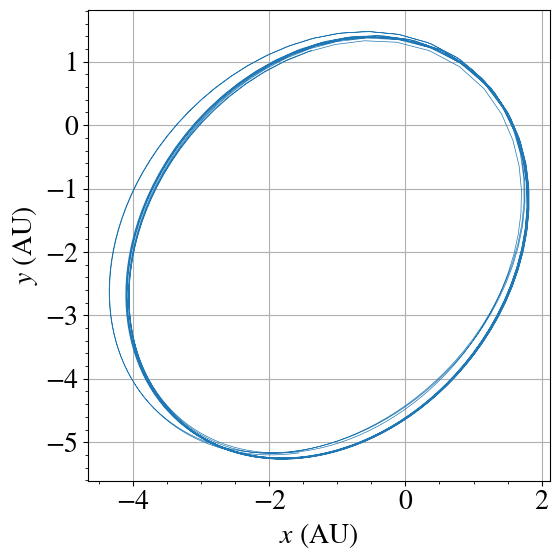

In [500]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

#ax1.plot(x[0], y[0], lw=0.5)
#ax1.plot(x[1], y[1], lw=0.5)
ax1.plot(x[2], y[2], lw=0.5)

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$x$ (AU)')
ax1.set_ylabel('$y$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

In [501]:
# initial energy and final energy

Ei=0.5*(vxi**2+vyi**2+vzi**2)+Epi
print('Initial energy:',Ei)

Ef=0.5*(vxf**2+vyf**2+vzf**2)+Epf
print('Final energy:',Ef)

print('Error:',100*(-(Ef-Ei)/Ei),'%')

Initial energy: -0.1445565455855624
Final energy: -0.1395446233796564
Error: 3.467101531517631 %


<font size="5">
Visually, the orbit doesn't seem to be changed.
    
The error is still same. I guess the source of error is not the parameter choices.
</font>

## 3.

In [502]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Pluto")
sim.add("Neptune")
sim.add("Uranus")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Mars")
sim.add("Earth")
sim.add("Venus")
sim.add("Mercury")

#sim.add(m=1e-7, a=460, e=0.4)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')


In [503]:
# time unit: 1/2pi

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,10.*year, Noutputs)
x0 = np.zeros((2,Noutputs))
y0 = np.zeros((2,Noutputs))
z0 = np.zeros((2,Noutputs))


sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


inc=ps[1].inc
f=ps[1].f
omega=ps[1].omega

for i,time in enumerate(times):
    sim.integrate(time)
    x0[0][i] = ps[0].x   # This stores the data which allows us to plot it later
    y0[0][i] = ps[0].y
    z0[0][i] = ps[0].z
    x0[1][i] = ps[1].x   # This stores the data which allows us to plot it later
    y0[1][i] = ps[1].y
    z0[1][i] = ps[1].z    

In [504]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Pluto")
sim.add("Neptune")
sim.add("Uranus")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Mars")
sim.add("Earth")
sim.add("Venus")
sim.add("Mercury")

sim.add(m=705, a=460, e=0.4, inc=inc, f=0, omega=omega)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')


In [505]:
# time unit: 1/2pi

Noutputs = 100
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,10.*year, Noutputs) # 10 yrs
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))


sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
#sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs


for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z   

In [506]:
r0=((x0[1]-x0[0])**2+(y0[1]-y0[0])**2)**0.5
r=((x[1]-x[0])**2+(y[1]-y[0])**2)**0.5

print((r[-1]-r0[-1])/r0[-1]*100)

10.000013570414366


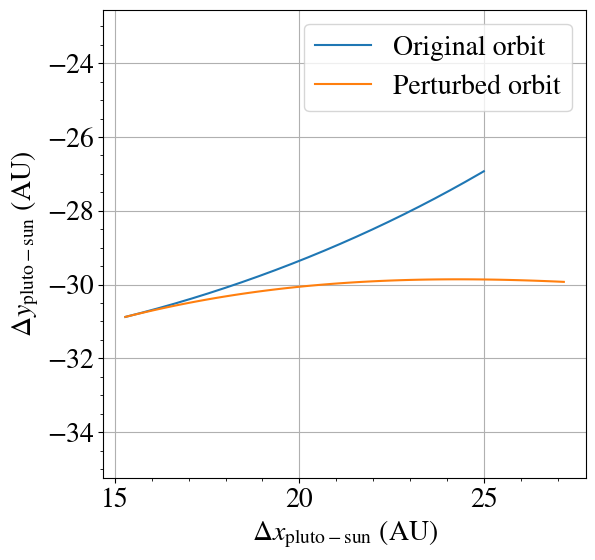

In [507]:
fig=plt.figure(figsize=(6.5,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(x0[1]-x0[0], y0[1]-y0[0], label='Original orbit')
ax1.plot(x[1]-x[0], y[1]-y[0], label='Perturbed orbit')
#ax1.plot(xf0-xf_sun0, yf0-yf_sun0,'r.')
#ax1.plot(xf-xf_sun, yf-yf_sun,'b.')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.axis('equal')
ax1.grid()
ax1.legend()

ax1.set_xlabel('$\Delta x_{\mathrm {pluto-sun}}$ (AU)')
ax1.set_ylabel('$\Delta y_{\mathrm {pluto-sun}}$ (AU)')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()

<font size="5">
To perturb 10% of the pluto's orbital radius calculated as a distance from the sun, "Planet X" should be at least 705 M$_{\odot}$.
    
Even with this massive mass of "Planet X", the perturbation is extremely small. This is the reason shy we haven't found any Planet Nine lying out there at a few hunderds of AU from the sun.    
</font>